## DGE testing using diffxpy: for all cell-circuit cell states all treatments vs. FC


In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import sparse

# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.verbosity = 3               
sc.logging.print_version_and_date()
sc.logging.print_header()

# making sure plots & clusters are reproducible
np.random.seed(42)

# custom functions
import sc_toolbox as sct
import re

# import diffxpy for DE testing
import diffxpy.api as de
import warnings
warnings.filterwarnings("ignore")

Running Scanpy 1.8.1, on 2022-12-04 08:55.


/home/niklas/miniconda3/envs/niche_fibrosis_env_diffxpy/lib/python3.8/site-packages/numba/core/cpu.py:97: UserWarning: Numba extension module 'sparse._numba_extension' failed to load due to 'ModuleNotFoundError(No module named 'numba.targets')'.
  numba.core.entrypoints.init_all()
2022-12-04 08:55:03.278146: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-04 08:55:03.278170: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


scanpy==1.8.1 anndata==0.7.6 umap==0.5.1 numpy==1.19.5 scipy==1.7.1 pandas==1.3.3 scikit-learn==1.0.1 statsmodels==0.12.2 pynndescent==0.5.4


In [2]:
## path variable
adata_dir = '/home/niklas/projects/niche_environments_FIBROSIS/PCLS_human/01_data/ASK_joint/211201_PCLS_human_ASK_joint_annotated_NIKLAS.h5ad'
results_dir = '/home/niklas/projects/niche_environments_FIBROSIS/PCLS_human/01_data/ASK_joint/DGE_treatment_vs_FC/'

In [3]:
## load data
adata = sc.read(adata_dir)

In [4]:
adata

AnnData object with n_obs × n_vars = 71055 × 17343
    obs: 'condition', 'modality', 'name', 'patient', 'timepoint', 'treatment', 'identifier', 'n_counts', 'n_genes', 'percent_mito', 'QC_group', 'doublet_scores', 'size_factors', 'leiden_1', 'leiden_2', 'cell_type', 'cell_type_group'
    var: 'n_cells', 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'cell_type_colors', 'cell_type_group_colors', 'condition_colors', 'dendrogram_cell_type', 'hvg', 'identifier_colors', 'leiden', 'leiden_1_colors', 'leiden_2_colors', 'name_colors', 'neighbors', 'patient_colors', 'pca', 'rank_genes_groups', 'treatment_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'unsouped_counts'
    obsp: 'connectivities', 'distances'

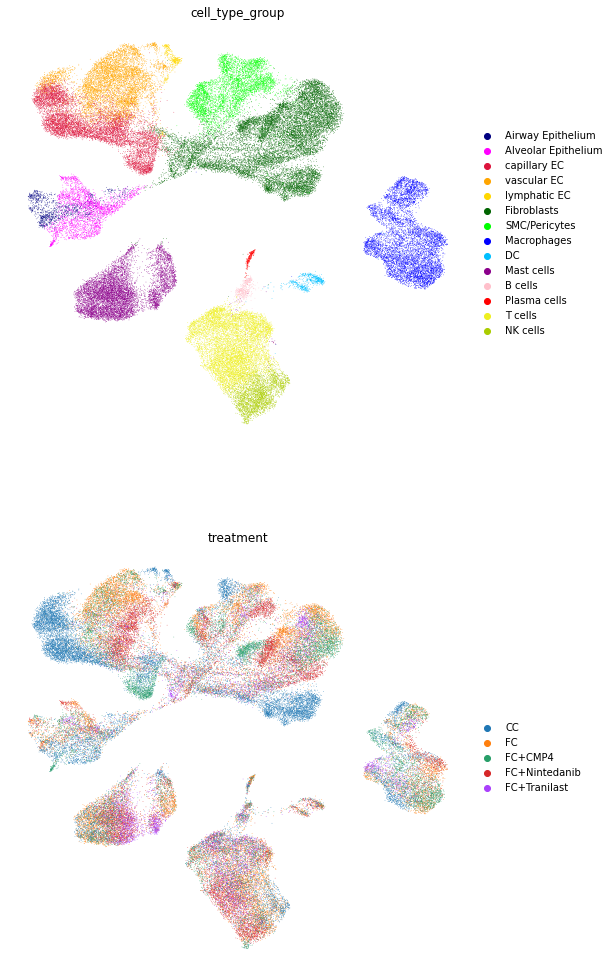

In [5]:
## plot UMAP
rcParams['figure.figsize'] = 8, 8
sc.pl.umap(adata, color = ['cell_type_group','treatment'], ncols = 1, frameon = False)

### Run DGE testing for all coarse graind cell type: Fibrotic Cocktail (FC) vs Control Cocktail (CC) after 6 days

In [6]:
## only FC, cmp4 and Nintedanib treatments
adata = adata[-adata.obs.treatment.isin(['FC+Tranilast','CC'])].copy()

In [7]:
## only cell types from cell-cell circuit
adata = adata[adata.obs.cell_type.isin(['Aberrant Basaloid','ectopic EC','Myofibroblasts','Pericytes','Profibrotic Macrophages'])].copy()

In [8]:
## Recommendation from Malte, scale the total number of counts beforehand
adata.obs['n_counts_scaled'] = adata.obs['n_counts']/adata.obs['n_counts'].mean()

In [9]:
adata.obs['treatment'].value_counts()

FC               8365
FC+CMP4          6003
FC+Nintedanib    4780
Name: treatment, dtype: int64

In [10]:
## get an overview of the cell type distribution across treatments
pd.crosstab(adata.obs['cell_type'],adata.obs['treatment'])

treatment,FC,FC+CMP4,FC+Nintedanib
cell_type,,,
Aberrant Basaloid,691,366,294
ectopic EC,3095,1196,1639
Myofibroblasts,2342,2458,1923
Pericytes,1120,741,652
Profibrotic Macrophages,1117,1242,272


In [11]:
cell_type_names = list(adata.obs.cell_type.cat.categories)
cell_type_names

['Aberrant Basaloid',
 'ectopic EC',
 'Myofibroblasts',
 'Pericytes',
 'Profibrotic Macrophages']

In [12]:
adata.obs.treatment.cat.categories

Index(['FC', 'FC+CMP4', 'FC+Nintedanib'], dtype='object')

In [13]:
## check treatment labels
adata.obs.treatment.cat.categories
treatment_groups = adata.obs.treatment.cat.categories[1:3]
treatment_groups

Index(['FC+CMP4', 'FC+Nintedanib'], dtype='object')

### Generate raw count object

In [14]:
adata.obs['grouping'] = adata.obs['treatment']



Performing DGE testing: Aberrant Basaloid FC+CMP4 vs. FC 


filtered out 4549 genes that are detected in less than 5 cells


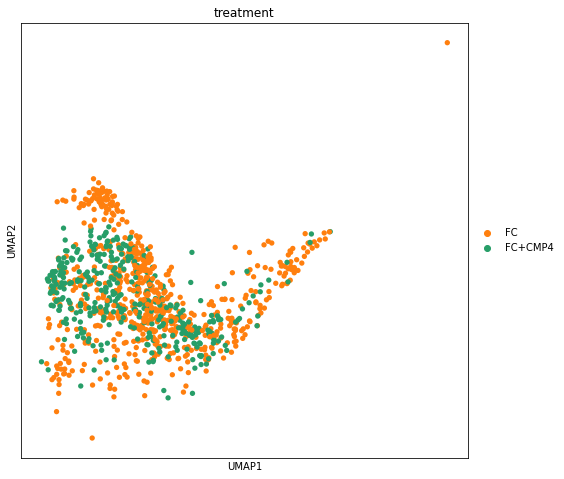

***DGE testing set-up: Aberrant Basaloid FC+CMP4 vs. FC***

N cells (total):
1057

N cells (per condition):
FC         691
FC+CMP4    366
Name: treatment, dtype: int64

Started Diffxpy Calculation:	04-12-2022 08:55:10
training location model: True
training scale model: True
iter   0: ll=31395345.600501
caught 102 linalg singular matrix errors
iter   1: ll=30313667.423540, converged: 0.00% (loc: 13.12%, scale update: False), in 3.04sec
iter   2: ll=30003349.820439, converged: 0.00% (loc: 13.12%, scale update: False), in 1.38sec
iter   3: ll=29971965.847709, converged: 0.00% (loc: 13.12%, scale update: False), in 1.52sec
iter   4: ll=29971059.637125, converged: 0.00% (loc: 13.12%, scale update: False), in 1.53sec
iter   5: ll=29971040.837243, converged: 0.00% (loc: 13.59%, scale update: False), in 1.50sec
iter   6: ll=9159336.279770, converged: 0.00% (loc: 0.00%, scale update: True), in 23.41sec
caught 102 linalg singular matrix errors
iter   7: ll=9134373.536336, converged: 0.00% (loc: 

iter  84: ll=9066342.572882, converged: 99.98% (loc: 100.00%, scale update: False), in 0.15sec
iter  85: ll=9066342.572882, converged: 99.99% (loc: 99.99%, scale update: True), in 0.17sec
iter  86: ll=9066342.572882, converged: 99.99% (loc: 99.99%, scale update: False), in 0.15sec
iter  87: ll=9066342.572882, converged: 99.99% (loc: 100.00%, scale update: False), in 0.14sec
iter  88: ll=9066342.572882, converged: 99.99% (loc: 99.99%, scale update: True), in 0.16sec
iter  89: ll=9066342.572882, converged: 99.99% (loc: 99.99%, scale update: False), in 0.15sec
iter  90: ll=9066342.572882, converged: 99.99% (loc: 100.00%, scale update: False), in 0.15sec
iter  91: ll=9066342.572882, converged: 99.99% (loc: 99.99%, scale update: True), in 0.15sec
iter  92: ll=9066342.572882, converged: 99.99% (loc: 99.99%, scale update: False), in 0.15sec
iter  93: ll=9066342.572882, converged: 99.99% (loc: 100.00%, scale update: False), in 0.15sec
iter  94: ll=9066342.572882, converged: 99.99% (loc: 99.99%

Warning: given your thresholds, more than 50 genes would have to be labeled.

To prevent overcrowding of your plot, make your thresholds stricter.
We will leave out the labels for now.

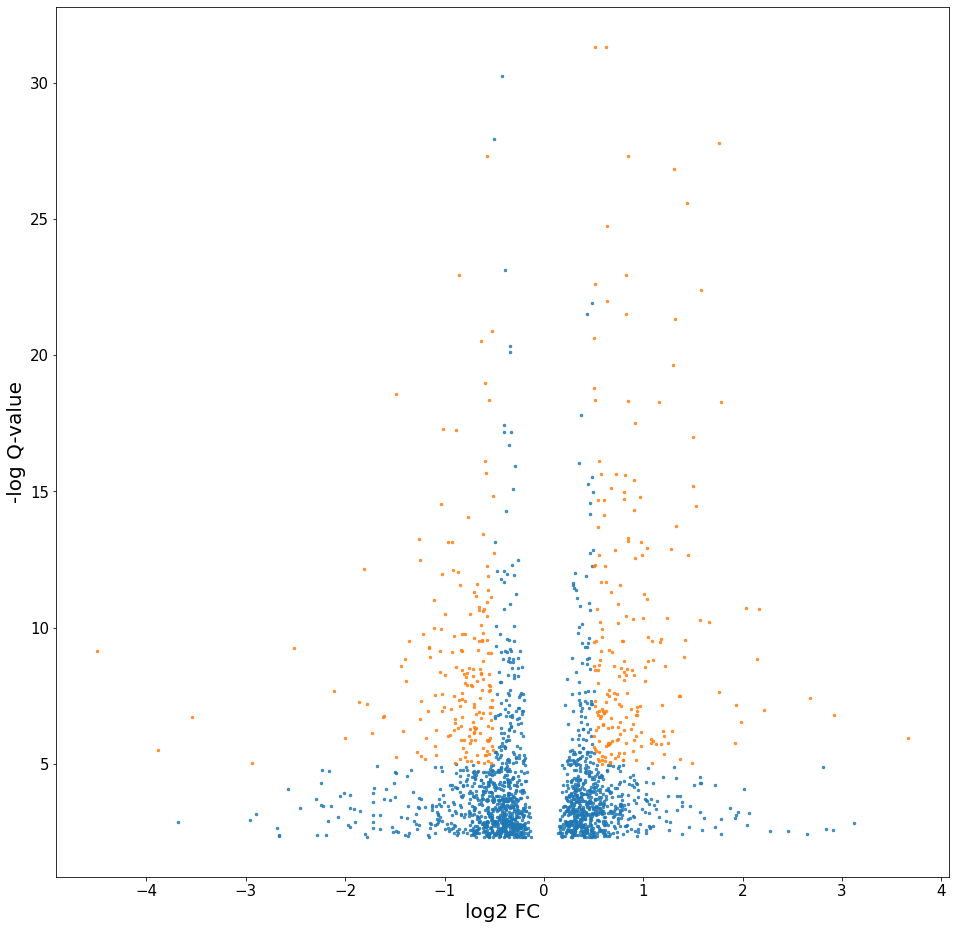

Filtering DGE results table
Saved DGE results to /home/niklas/projects/niche_environments_FIBROSIS/PCLS_human/01_data/ASK_joint/DGE_treatment_vs_FC/221204_PCLS_human_ASK_joint_Aberrant_Basaloid_FC+CMP4_vs_FC_DGE_results.csv


Performing DGE testing: Aberrant Basaloid FC+Nintedanib vs. FC 


filtered out 4432 genes that are detected in less than 5 cells


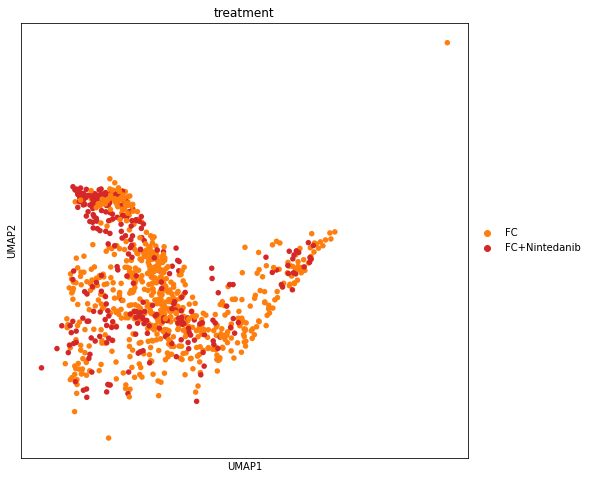

***DGE testing set-up: Aberrant Basaloid FC+Nintedanib vs. FC***

N cells (total):
985

N cells (per condition):
FC               691
FC+Nintedanib    294
Name: treatment, dtype: int64

Started Diffxpy Calculation:	04-12-2022 08:58:50
training location model: True
training scale model: True
iter   0: ll=39022727.582661
caught 67 linalg singular matrix errors
iter   1: ll=37874734.683653, converged: 0.00% (loc: 15.10%, scale update: False), in 1.43sec
iter   2: ll=37493000.145755, converged: 0.00% (loc: 15.10%, scale update: False), in 1.51sec
iter   3: ll=37437043.537511, converged: 0.00% (loc: 15.10%, scale update: False), in 1.54sec
iter   4: ll=37433475.377009, converged: 0.00% (loc: 15.10%, scale update: False), in 1.39sec
iter   5: ll=37433310.914896, converged: 0.00% (loc: 15.19%, scale update: False), in 1.54sec
iter   6: ll=9214168.628886, converged: 0.00% (loc: 0.00%, scale update: True), in 21.98sec
caught 65 linalg singular matrix errors
iter   7: ll=9184567.081128, converge

iter  85: ll=9131962.678502, converged: 99.87% (loc: 100.00%, scale update: False), in 0.18sec
iter  86: ll=9131962.678357, converged: 99.89% (loc: 99.89%, scale update: True), in 1.59sec
iter  87: ll=9131962.678225, converged: 99.89% (loc: 99.92%, scale update: False), in 0.25sec
iter  88: ll=9131962.678223, converged: 99.89% (loc: 99.95%, scale update: False), in 0.20sec
iter  89: ll=9131962.678223, converged: 99.89% (loc: 99.99%, scale update: False), in 0.18sec
iter  90: ll=9131962.678223, converged: 99.89% (loc: 100.00%, scale update: False), in 0.14sec
iter  91: ll=9131962.678097, converged: 99.91% (loc: 99.91%, scale update: True), in 1.53sec
iter  92: ll=9131962.677980, converged: 99.91% (loc: 99.95%, scale update: False), in 0.22sec
iter  93: ll=9131962.677979, converged: 99.91% (loc: 99.97%, scale update: False), in 0.21sec
iter  94: ll=9131962.677978, converged: 99.91% (loc: 99.99%, scale update: False), in 0.18sec
iter  95: ll=9131962.677978, converged: 99.91% (loc: 100.00%

Warning: given your thresholds, more than 50 genes would have to be labeled.

To prevent overcrowding of your plot, make your thresholds stricter.
We will leave out the labels for now.

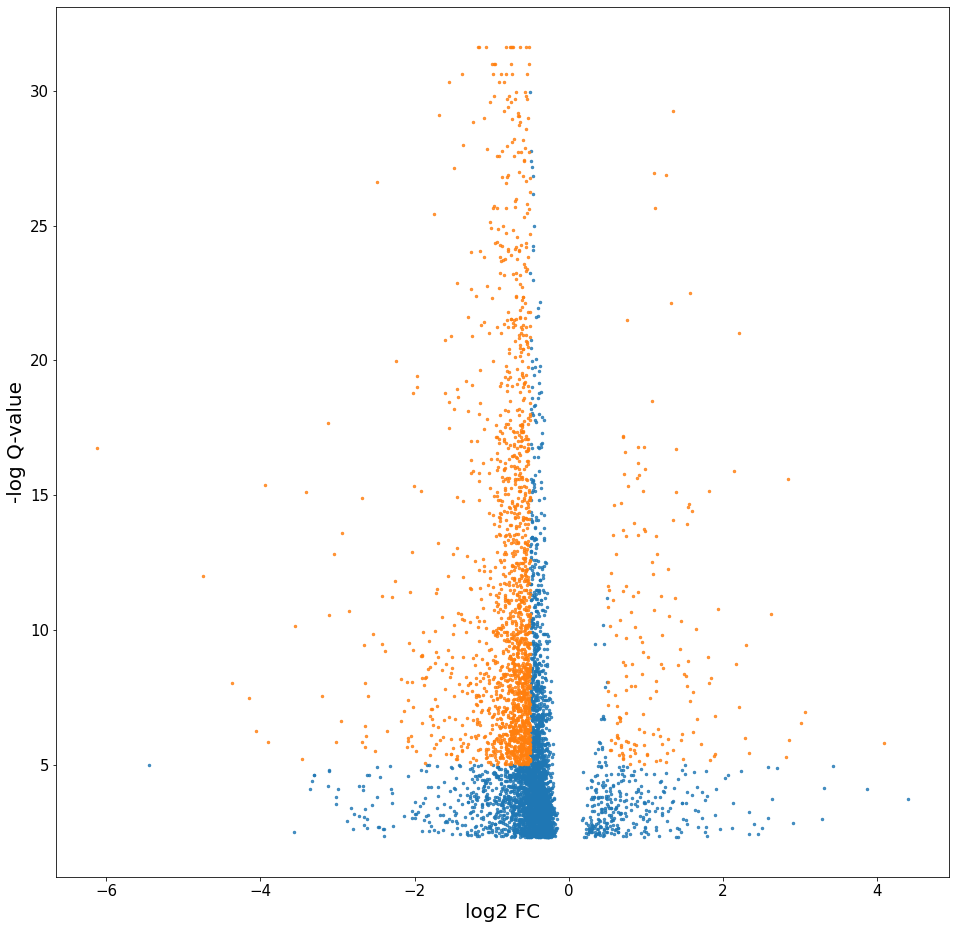

Filtering DGE results table
Saved DGE results to /home/niklas/projects/niche_environments_FIBROSIS/PCLS_human/01_data/ASK_joint/DGE_treatment_vs_FC/221204_PCLS_human_ASK_joint_Aberrant_Basaloid_FC+Nintedanib_vs_FC_DGE_results.csv


Performing DGE testing: ectopic EC FC+CMP4 vs. FC 


filtered out 4557 genes that are detected in less than 5 cells


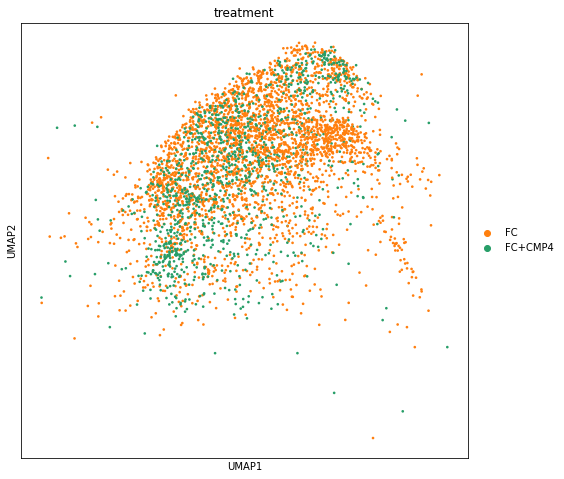

***DGE testing set-up: ectopic EC FC+CMP4 vs. FC***

N cells (total):
4291

N cells (per condition):
FC         3095
FC+CMP4    1196
Name: treatment, dtype: int64

Started Diffxpy Calculation:	04-12-2022 09:02:36
training location model: True
training scale model: True
iter   0: ll=34472084.153849
caught 353 linalg singular matrix errors
iter   1: ll=31191146.719094, converged: 0.00% (loc: 4.41%, scale update: False), in 6.09sec
iter   2: ll=30370642.512963, converged: 0.00% (loc: 4.41%, scale update: False), in 4.56sec
iter   3: ll=30319374.357865, converged: 0.00% (loc: 4.41%, scale update: False), in 4.67sec
iter   4: ll=30319087.091479, converged: 0.00% (loc: 4.41%, scale update: False), in 5.05sec
iter   5: ll=30319086.582366, converged: 0.00% (loc: 14.23%, scale update: False), in 4.66sec
iter   6: ll=27586599.676857, converged: 0.00% (loc: 0.00%, scale update: True), in 83.81sec
caught 347 linalg singular matrix errors
iter   7: ll=27579223.706030, converged: 0.00% (loc: 3.39%, 

iter  81: ll=27533999.505166, converged: 100.00% (loc: 100.00%, scale update: True), in 0.21sec
Finished Diffxpy Calculation:	04-12-2022 09:11:30
Writing DGE results table


Warning: given your thresholds, more than 50 genes would have to be labeled.

To prevent overcrowding of your plot, make your thresholds stricter.
We will leave out the labels for now.

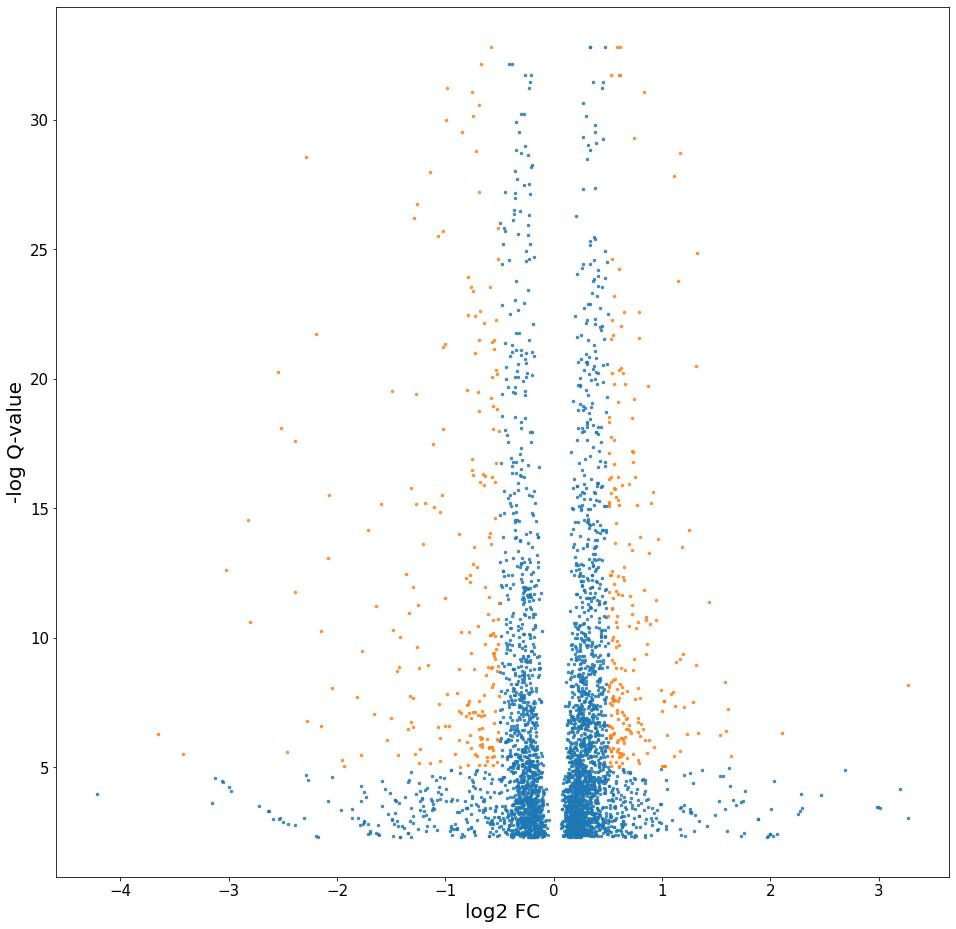

Filtering DGE results table
Saved DGE results to /home/niklas/projects/niche_environments_FIBROSIS/PCLS_human/01_data/ASK_joint/DGE_treatment_vs_FC/221204_PCLS_human_ASK_joint_ectopic_EC_FC+CMP4_vs_FC_DGE_results.csv


Performing DGE testing: ectopic EC FC+Nintedanib vs. FC 


filtered out 4372 genes that are detected in less than 5 cells


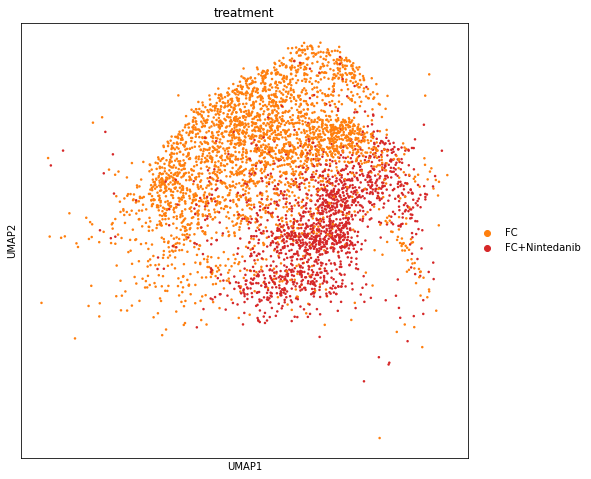

***DGE testing set-up: ectopic EC FC+Nintedanib vs. FC***

N cells (total):
4734

N cells (per condition):
FC               3095
FC+Nintedanib    1639
Name: treatment, dtype: int64

Started Diffxpy Calculation:	04-12-2022 09:11:32
training location model: True
training scale model: True
iter   0: ll=39180916.694412
caught 181 linalg singular matrix errors
iter   1: ll=35460331.230826, converged: 0.00% (loc: 3.68%, scale update: False), in 5.54sec
iter   2: ll=34551993.870613, converged: 0.00% (loc: 3.68%, scale update: False), in 4.81sec
iter   3: ll=34497001.718311, converged: 0.00% (loc: 3.68%, scale update: False), in 4.84sec
iter   4: ll=34496691.164474, converged: 0.00% (loc: 3.69%, scale update: False), in 5.38sec
iter   5: ll=34496690.324139, converged: 0.00% (loc: 15.92%, scale update: False), in 5.42sec
iter   6: ll=31682587.762275, converged: 0.00% (loc: 0.00%, scale update: True), in 95.13sec
caught 180 linalg singular matrix errors
iter   7: ll=31674533.035802, converged: 0

Warning: given your thresholds, more than 50 genes would have to be labeled.

To prevent overcrowding of your plot, make your thresholds stricter.
We will leave out the labels for now.

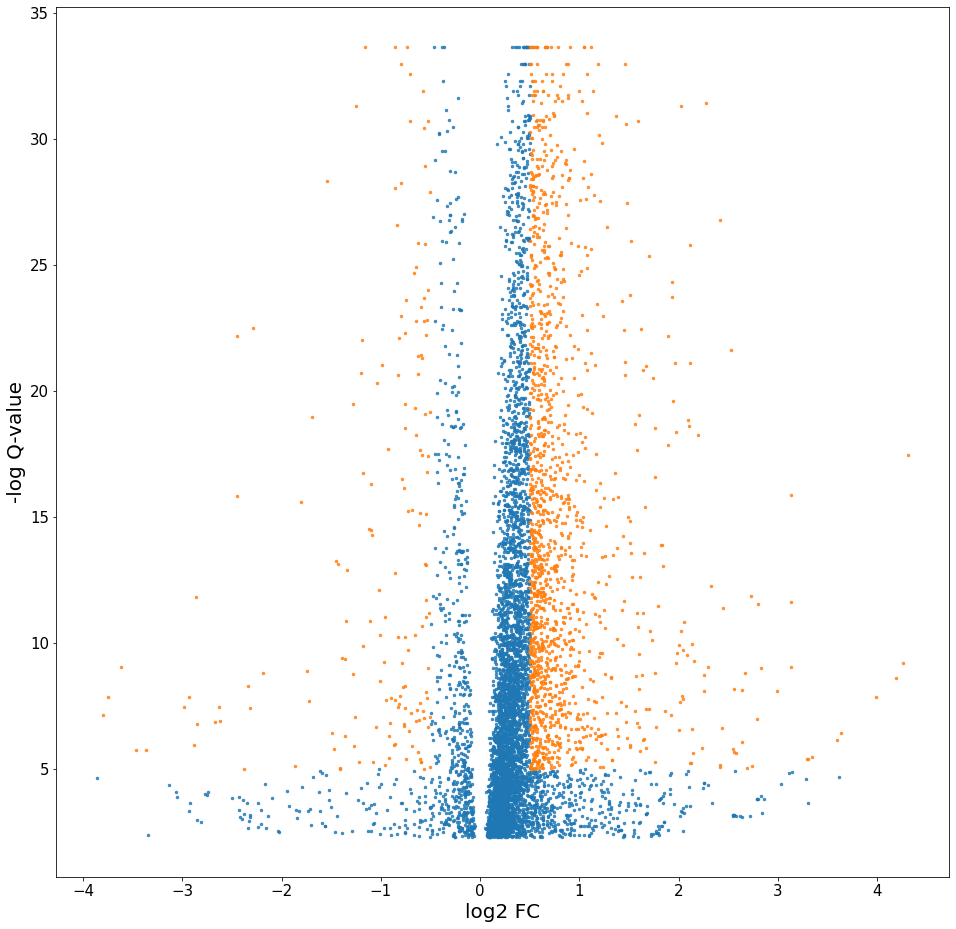

Filtering DGE results table
Saved DGE results to /home/niklas/projects/niche_environments_FIBROSIS/PCLS_human/01_data/ASK_joint/DGE_treatment_vs_FC/221204_PCLS_human_ASK_joint_ectopic_EC_FC+Nintedanib_vs_FC_DGE_results.csv


Performing DGE testing: Myofibroblasts FC+CMP4 vs. FC 


filtered out 3651 genes that are detected in less than 5 cells


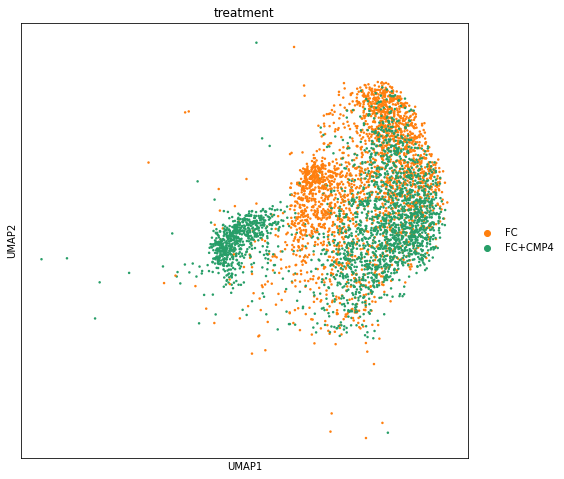

***DGE testing set-up: Myofibroblasts FC+CMP4 vs. FC***

N cells (total):
4800

N cells (per condition):
FC+CMP4    2458
FC         2342
Name: treatment, dtype: int64

Started Diffxpy Calculation:	04-12-2022 09:21:08
training location model: True
training scale model: True
iter   0: ll=44205132.768230
caught 49 linalg singular matrix errors
iter   1: ll=39829170.766265, converged: 0.00% (loc: 3.67%, scale update: False), in 5.89sec
iter   2: ll=38778100.719155, converged: 0.00% (loc: 3.67%, scale update: False), in 5.45sec
iter   3: ll=38704921.101349, converged: 0.00% (loc: 3.67%, scale update: False), in 5.07sec
iter   4: ll=38703891.481851, converged: 0.00% (loc: 3.67%, scale update: False), in 5.73sec
iter   5: ll=38703881.469458, converged: 0.00% (loc: 4.76%, scale update: False), in 5.60sec
iter   6: ll=35596177.149968, converged: 0.00% (loc: 0.00%, scale update: True), in 100.46sec
caught 49 linalg singular matrix errors
iter   7: ll=35585261.634252, converged: 0.00% (loc: 1.66%

Warning: given your thresholds, more than 50 genes would have to be labeled.

To prevent overcrowding of your plot, make your thresholds stricter.
We will leave out the labels for now.

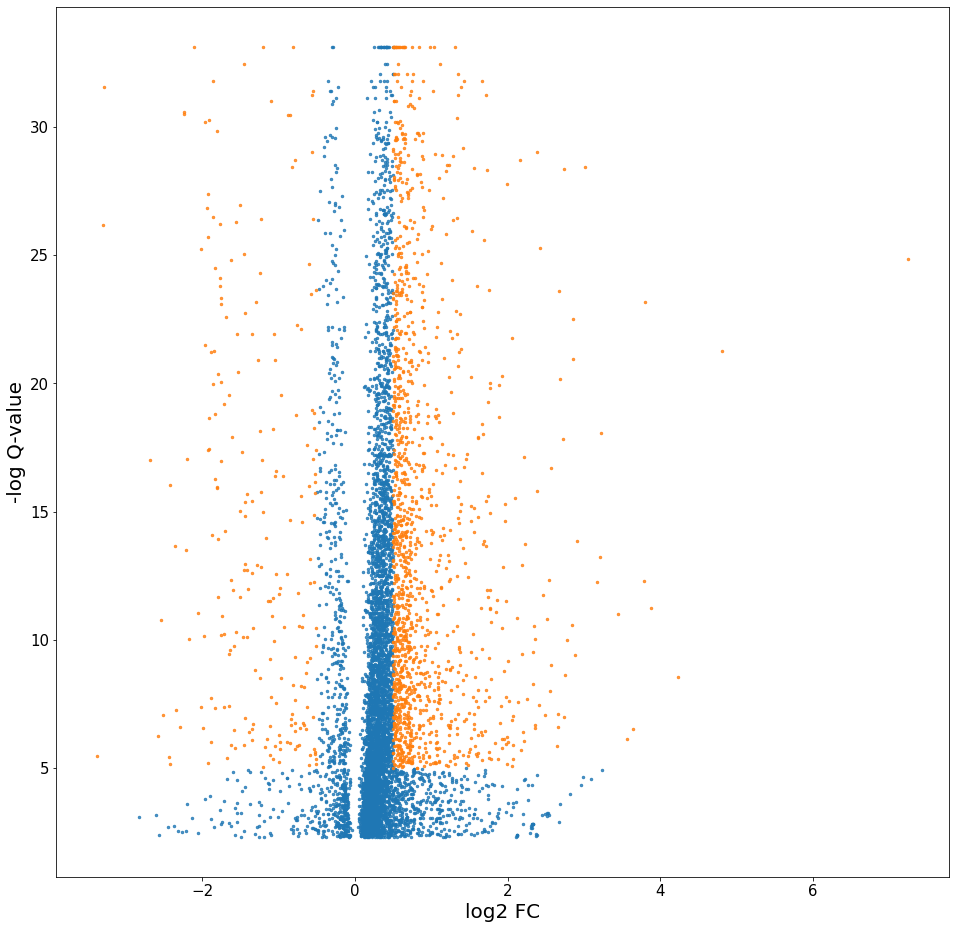

Filtering DGE results table
Saved DGE results to /home/niklas/projects/niche_environments_FIBROSIS/PCLS_human/01_data/ASK_joint/DGE_treatment_vs_FC/221204_PCLS_human_ASK_joint_Myofibroblasts_FC+CMP4_vs_FC_DGE_results.csv


Performing DGE testing: Myofibroblasts FC+Nintedanib vs. FC 


filtered out 3623 genes that are detected in less than 5 cells


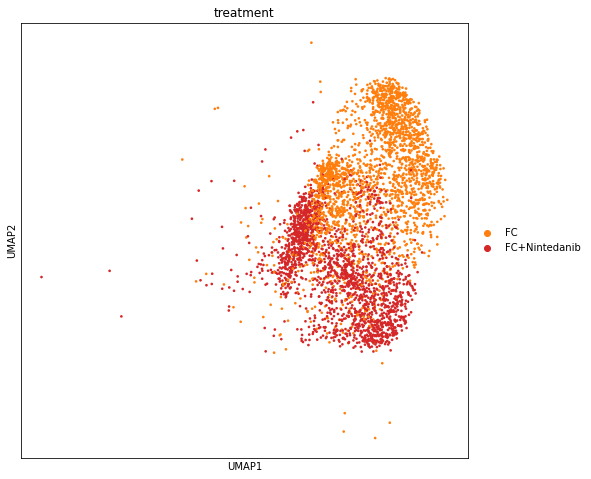

***DGE testing set-up: Myofibroblasts FC+Nintedanib vs. FC***

N cells (total):
4265

N cells (per condition):
FC               2342
FC+Nintedanib    1923
Name: treatment, dtype: int64

Started Diffxpy Calculation:	04-12-2022 09:32:02
training location model: True
training scale model: True
iter   0: ll=39644833.278369
caught 122 linalg singular matrix errors
iter   1: ll=36227863.458318, converged: 0.00% (loc: 3.82%, scale update: False), in 5.02sec
iter   2: ll=35367765.572476, converged: 0.00% (loc: 3.82%, scale update: False), in 4.87sec
iter   3: ll=35306384.296357, converged: 0.00% (loc: 3.82%, scale update: False), in 4.91sec
iter   4: ll=35305605.166023, converged: 0.00% (loc: 3.82%, scale update: False), in 5.35sec
iter   5: ll=35305597.563245, converged: 0.00% (loc: 4.75%, scale update: False), in 4.84sec
iter   6: ll=32177404.415888, converged: 0.01% (loc: 0.01%, scale update: True), in 89.79sec
caught 120 linalg singular matrix errors
iter   7: ll=32163982.060312, converged

Warning: given your thresholds, more than 50 genes would have to be labeled.

To prevent overcrowding of your plot, make your thresholds stricter.
We will leave out the labels for now.

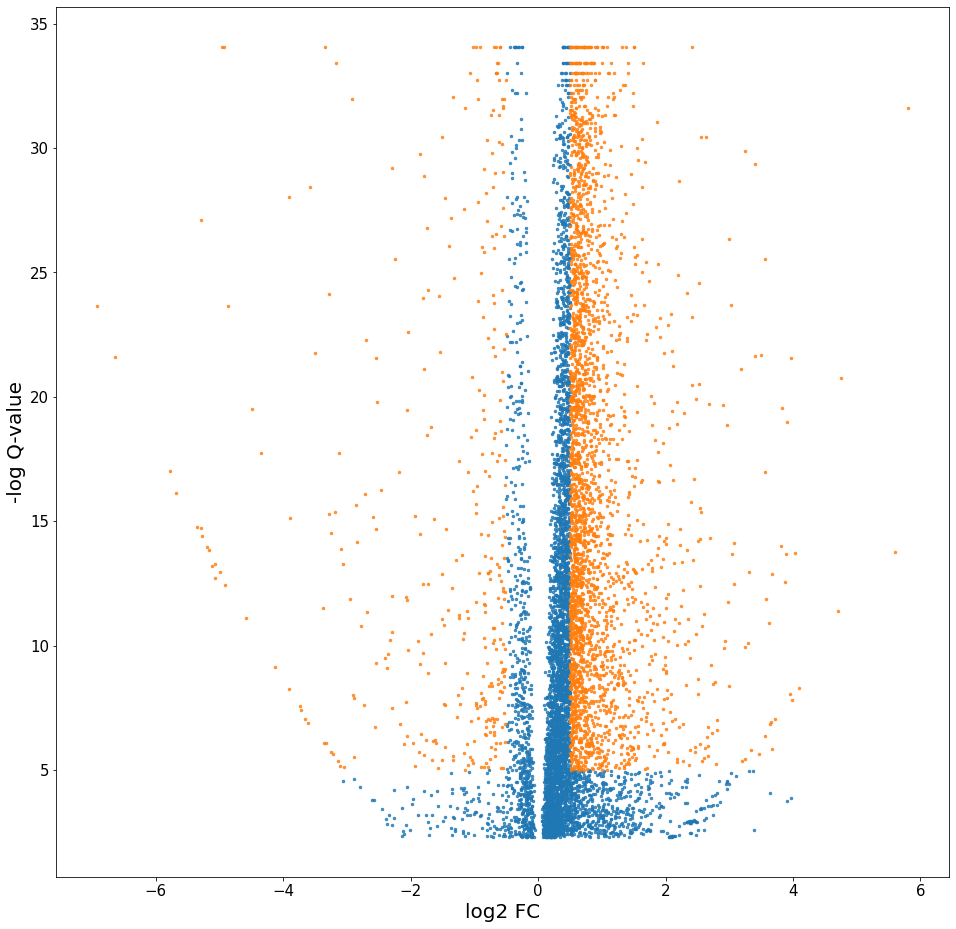

Filtering DGE results table
Saved DGE results to /home/niklas/projects/niche_environments_FIBROSIS/PCLS_human/01_data/ASK_joint/DGE_treatment_vs_FC/221204_PCLS_human_ASK_joint_Myofibroblasts_FC+Nintedanib_vs_FC_DGE_results.csv


Performing DGE testing: Pericytes FC+CMP4 vs. FC 


filtered out 4474 genes that are detected in less than 5 cells


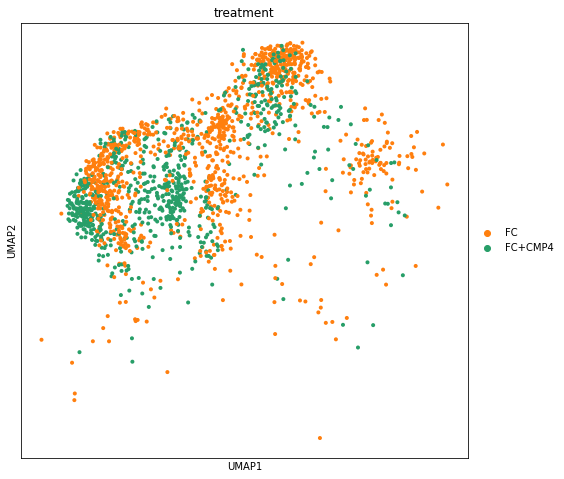

***DGE testing set-up: Pericytes FC+CMP4 vs. FC***

N cells (total):
1861

N cells (per condition):
FC         1120
FC+CMP4     741
Name: treatment, dtype: int64

Started Diffxpy Calculation:	04-12-2022 09:41:58
training location model: True
training scale model: True
iter   0: ll=17526682.892569
caught 116 linalg singular matrix errors
iter   1: ll=15805485.307064, converged: 0.00% (loc: 2.46%, scale update: False), in 2.91sec
iter   2: ll=15399626.112538, converged: 0.00% (loc: 2.46%, scale update: False), in 3.08sec
iter   3: ll=15373823.870021, converged: 0.00% (loc: 2.46%, scale update: False), in 2.88sec
iter   4: ll=15373572.127611, converged: 0.00% (loc: 2.46%, scale update: False), in 2.98sec
iter   5: ll=15373570.636104, converged: 0.00% (loc: 4.75%, scale update: False), in 2.66sec
iter   6: ll=14408725.253578, converged: 0.00% (loc: 0.00%, scale update: True), in 33.85sec
caught 114 linalg singular matrix errors
iter   7: ll=14405769.369564, converged: 0.00% (loc: 1.46%, sc

Warning: given your thresholds, more than 50 genes would have to be labeled.

To prevent overcrowding of your plot, make your thresholds stricter.
We will leave out the labels for now.

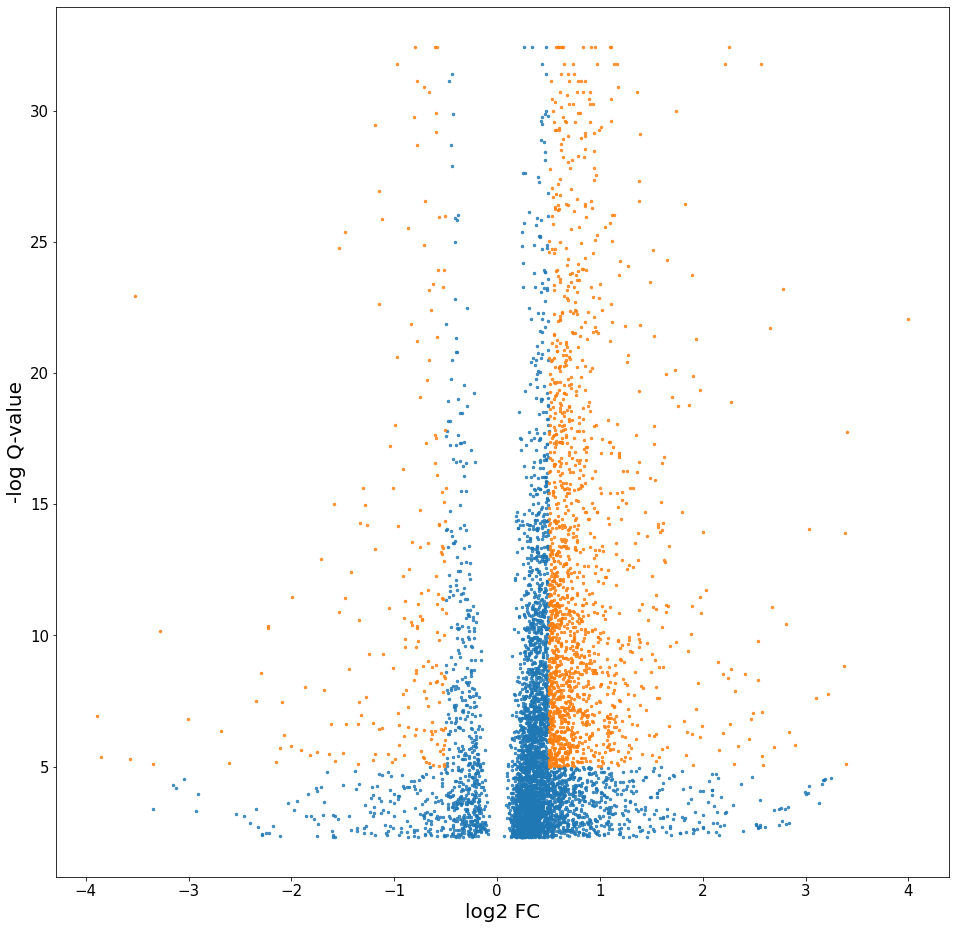

Filtering DGE results table
Saved DGE results to /home/niklas/projects/niche_environments_FIBROSIS/PCLS_human/01_data/ASK_joint/DGE_treatment_vs_FC/221204_PCLS_human_ASK_joint_Pericytes_FC+CMP4_vs_FC_DGE_results.csv


Performing DGE testing: Pericytes FC+Nintedanib vs. FC 


filtered out 4551 genes that are detected in less than 5 cells


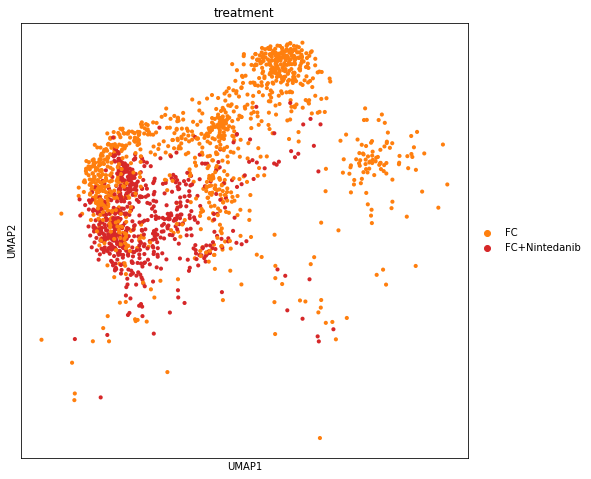

***DGE testing set-up: Pericytes FC+Nintedanib vs. FC***

N cells (total):
1772

N cells (per condition):
FC               1120
FC+Nintedanib     652
Name: treatment, dtype: int64

Started Diffxpy Calculation:	04-12-2022 09:46:21
training location model: True
training scale model: True
iter   0: ll=16773232.537508
caught 229 linalg singular matrix errors
iter   1: ll=15146821.626335, converged: 0.00% (loc: 3.16%, scale update: False), in 3.03sec
iter   2: ll=14760969.859273, converged: 0.00% (loc: 3.16%, scale update: False), in 2.62sec
iter   3: ll=14736172.896810, converged: 0.00% (loc: 3.16%, scale update: False), in 2.76sec
iter   4: ll=14735922.826940, converged: 0.00% (loc: 3.16%, scale update: False), in 2.83sec
iter   5: ll=14735921.116327, converged: 0.00% (loc: 5.01%, scale update: False), in 2.67sec
iter   6: ll=13686412.700344, converged: 0.00% (loc: 0.00%, scale update: True), in 32.64sec
caught 227 linalg singular matrix errors
iter   7: ll=13683377.811144, converged: 0.0

Warning: given your thresholds, more than 50 genes would have to be labeled.

To prevent overcrowding of your plot, make your thresholds stricter.
We will leave out the labels for now.

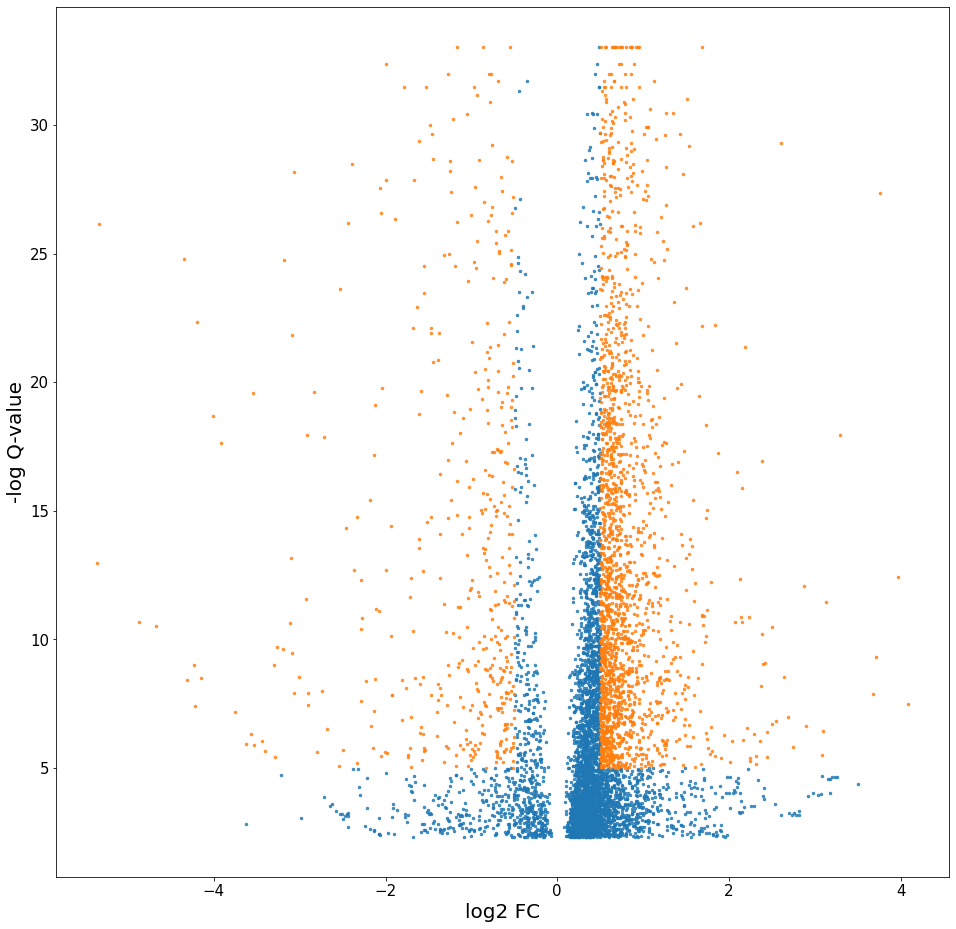

Filtering DGE results table
Saved DGE results to /home/niklas/projects/niche_environments_FIBROSIS/PCLS_human/01_data/ASK_joint/DGE_treatment_vs_FC/221204_PCLS_human_ASK_joint_Pericytes_FC+Nintedanib_vs_FC_DGE_results.csv


Performing DGE testing: Profibrotic Macrophages FC+CMP4 vs. FC 


filtered out 6104 genes that are detected in less than 5 cells


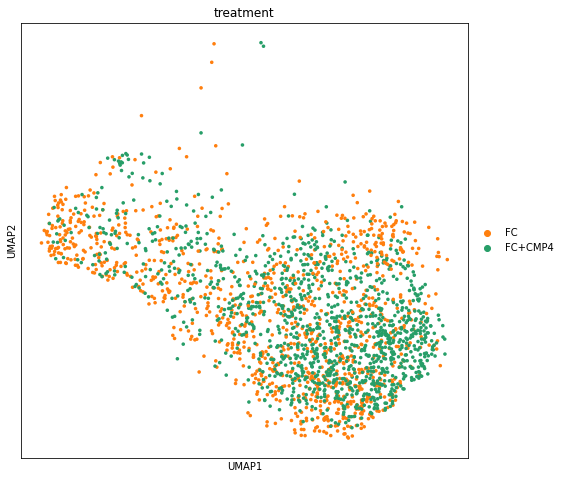

***DGE testing set-up: Profibrotic Macrophages FC+CMP4 vs. FC***

N cells (total):
2359

N cells (per condition):
FC+CMP4    1242
FC         1117
Name: treatment, dtype: int64

Started Diffxpy Calculation:	04-12-2022 09:50:32
training location model: True
training scale model: True
iter   0: ll=12411445.180289
caught 72 linalg singular matrix errors
iter   1: ll=11212380.854624, converged: 0.00% (loc: 1.18%, scale update: False), in 2.72sec
iter   2: ll=10925516.588448, converged: 0.00% (loc: 1.19%, scale update: False), in 2.81sec
iter   3: ll=10908889.581870, converged: 0.00% (loc: 1.19%, scale update: False), in 2.70sec
iter   4: ll=10908812.266450, converged: 0.00% (loc: 1.23%, scale update: False), in 2.78sec
iter   5: ll=10908812.127686, converged: 0.00% (loc: 19.46%, scale update: False), in 2.95sec
iter   6: ll=10290250.947352, converged: 0.00% (loc: 0.00%, scale update: True), in 35.99sec
caught 72 linalg singular matrix errors
iter   7: ll=10289188.478679, converged: 0.00% (l

Warning: given your thresholds, more than 50 genes would have to be labeled.

To prevent overcrowding of your plot, make your thresholds stricter.
We will leave out the labels for now.

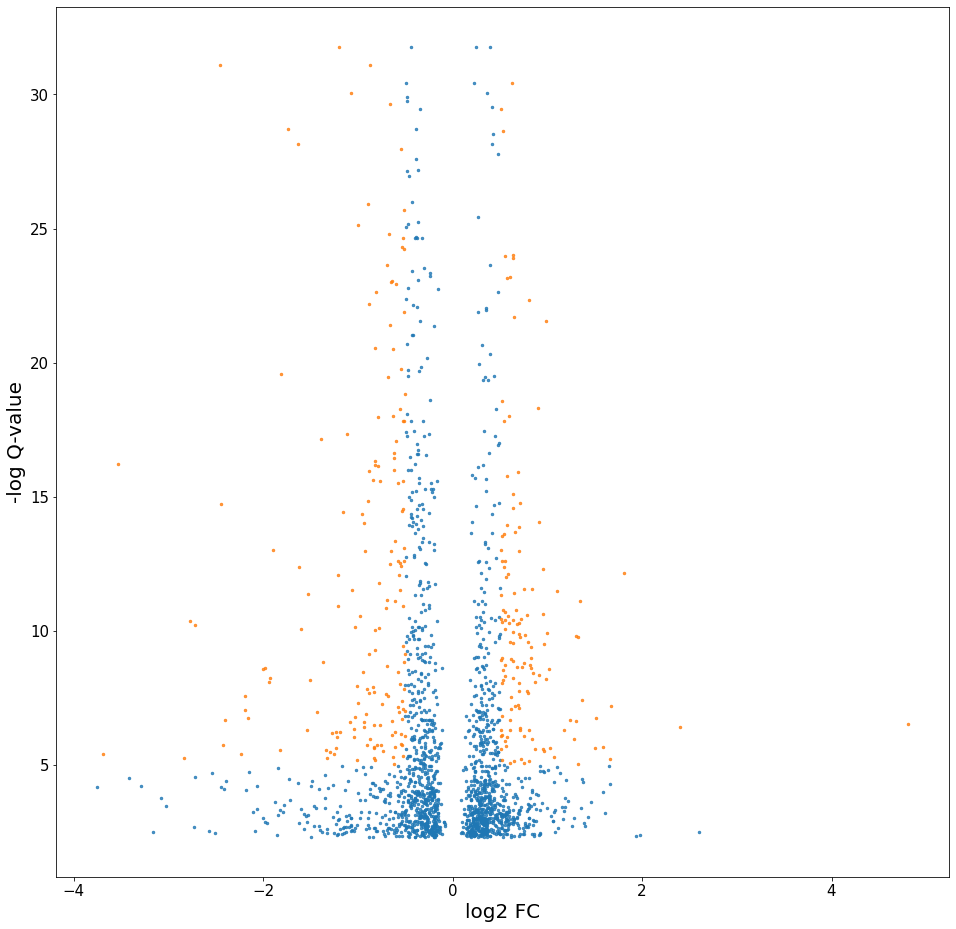

Filtering DGE results table
Saved DGE results to /home/niklas/projects/niche_environments_FIBROSIS/PCLS_human/01_data/ASK_joint/DGE_treatment_vs_FC/221204_PCLS_human_ASK_joint_Profibrotic_Macrophages_FC+CMP4_vs_FC_DGE_results.csv


Performing DGE testing: Profibrotic Macrophages FC+Nintedanib vs. FC 


filtered out 6337 genes that are detected in less than 5 cells


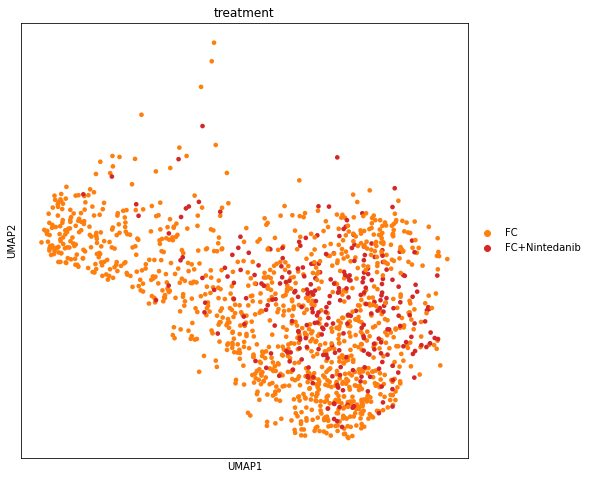

***DGE testing set-up: Profibrotic Macrophages FC+Nintedanib vs. FC***

N cells (total):
1389

N cells (per condition):
FC               1117
FC+Nintedanib     272
Name: treatment, dtype: int64

Started Diffxpy Calculation:	04-12-2022 09:54:10
training location model: True
training scale model: True
iter   0: ll=8399198.793437
caught 230 linalg singular matrix errors
iter   1: ll=7577120.113165, converged: 0.00% (loc: 2.93%, scale update: False), in 2.08sec
iter   2: ll=7396362.354913, converged: 0.00% (loc: 2.93%, scale update: False), in 2.29sec
iter   3: ll=7387052.414675, converged: 0.00% (loc: 2.93%, scale update: False), in 2.43sec
iter   4: ll=7387011.071447, converged: 0.00% (loc: 2.93%, scale update: False), in 2.15sec
iter   5: ll=7387010.973206, converged: 0.00% (loc: 28.36%, scale update: False), in 1.96sec
iter   6: ll=6822610.028666, converged: 0.00% (loc: 0.00%, scale update: True), in 24.84sec
caught 230 linalg singular matrix errors
iter   7: ll=6821747.808695, converg

Warning: given your thresholds, more than 50 genes would have to be labeled.

To prevent overcrowding of your plot, make your thresholds stricter.
We will leave out the labels for now.

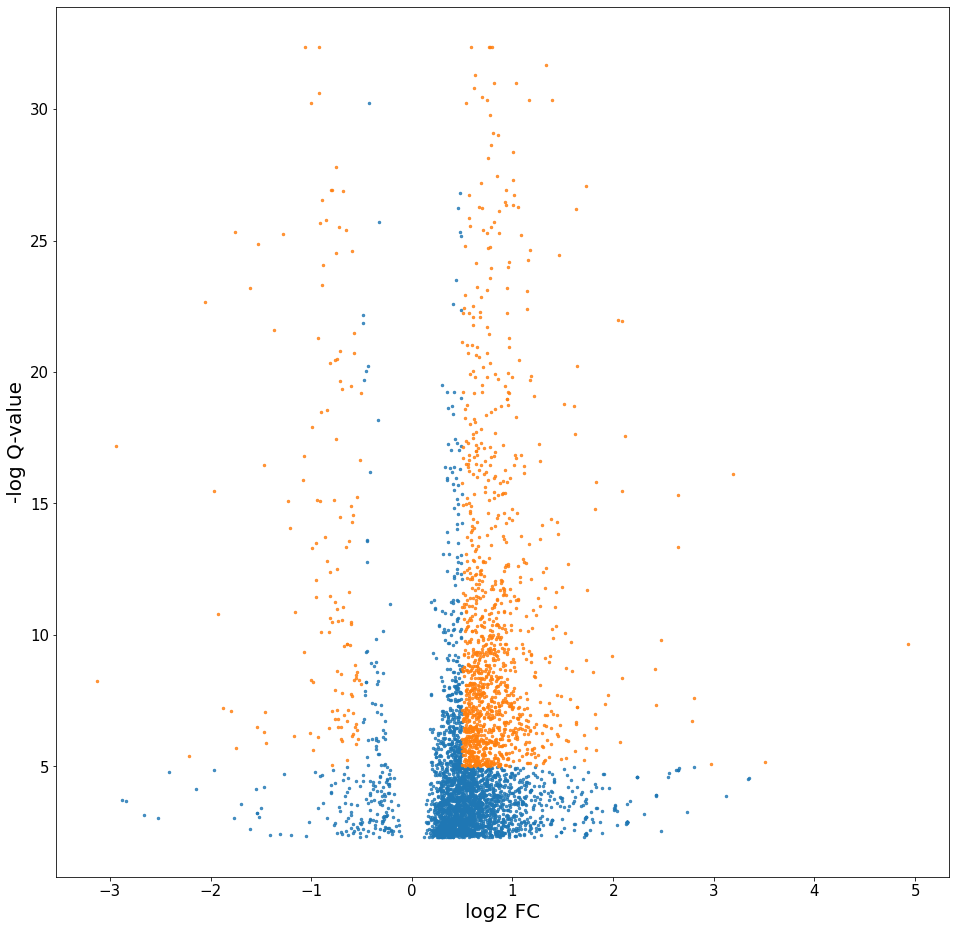

Filtering DGE results table
Saved DGE results to /home/niklas/projects/niche_environments_FIBROSIS/PCLS_human/01_data/ASK_joint/DGE_treatment_vs_FC/221204_PCLS_human_ASK_joint_Profibrotic_Macrophages_FC+Nintedanib_vs_FC_DGE_results.csv


In [15]:
## iterative DGE testing
for ct in cell_type_names:
    for tg in treatment_groups:
    
        ## step 1: define DGE testing set up
        cell_type = ct # cell type of interest
        condition_label = 'treatment'# meta data variable storing the condition to test
        groups = ['FC',tg]
        print('\n\nPerforming DGE testing: {} {} vs. {} \n\n'.format(cell_type, groups[1],groups[0]))
        
        adata_sub = adata[adata.obs.treatment.isin(['FC',tg])].copy()

        ## step 2: generate count object for DGE testing
        adata_raw = sct.calc.generate_count_object(adata_sub, hue = condition_label,
                                                cell_type_label = 'cell_type',
                                                cell_type = [cell_type], ref = 'FC', min_cells = 5,
                                                subset = groups)
        print('***DGE testing set-up: {} {} vs. {}***\n'.format(cell_type, groups[1],groups[0]))
        print('N cells (total):\n{}\n'.format(adata_raw.shape[0]))
        print('N cells (per condition):\n{}\n'.format(adata_raw.obs[condition_label].value_counts()))

        ## step 3: perform DGE testing
        print('Started Diffxpy Calculation:\t%s' %sct.util.timestamp())
        de_test = de.test.wald(data = adata_raw.X,
                               formula_loc = '~ 1 + treatment',
                               factor_loc_totest = 'treatment',
                               gene_names = adata_raw.var_names,
                               sample_description = adata_raw.obs,
                               noise_model = 'nb',
                               size_factors = 'n_counts_scaled')
        
        print('Finished Diffxpy Calculation:\t%s' %sct.util.timestamp())

        ## step 4: generate and filter results
        # create unfiltered results table
        print('Writing DGE results table')
        qval_thresh = 0.1
        result = de_test.summary().sort_values(by=["qval"], ascending=True)
        result = result[result.qval < qval_thresh].loc[:, ].copy()
        dge = sct.calc.add_percentages(adata[adata_raw.obs_names], result, ids=groups, group_by=condition_label)

        # overview volcano plot
        sct.plot.volcano_plot(dge, fdr_thresh = 5, log_fc_thresh = 0.5,
                              adj_p_val = 'qval', log_fc = 'log2fc',
                              gene = 'gene', figsize = (16, 16), save = None)

        # filter DGE table
        print('Filtering DGE results table')
        #dge = dge[dge.qval < 0.05].copy()
        #dge = dge[(dge.log2fc > 0.5) | (dge.log2fc < -0.5)].copy()

        # sort DGE table by logFC
        dge = dge.sort_values('log2fc', ascending = False)

        ## step 5: save results
        ct_label = ct.split()
        s = '_'
        ct_label = s.join(ct_label)
        ct_label = ct_label.replace('/','_')
        ct_label = str(ct_label)
        csv_dir = results_dir + '221204_PCLS_human_ASK_joint_' + ct_label + '_' + tg + '_vs_FC_DGE_results.csv' 
        csv_dir = str(csv_dir)
        dge.to_csv(csv_dir, index = False)
        print('Saved DGE results to', csv_dir)